# **Assignment 2**

#### **Jamia Russell**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("SalaryData.csv", header=0, low_memory=False)

In [3]:
print(df.head())
print('------------------------------------------')
print(df.dtypes)

    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
------------------------------------------
Age                    float64
Gender                  object
Education Level         object
Job Title               object
Years of Experience    float64
Salary                 float64
dtype: object


In [4]:
missing= df.isnull().sum()
print(missing)
print("----------------------------")
cleandf = df.dropna()
missing2 = cleandf.isnull().sum()
print(missing2)
print("----------------------------")
print(cleandf.head())

Age                    2
Gender                 2
Education Level        2
Job Title              2
Years of Experience    2
Salary                 2
dtype: int64
----------------------------
Age                    0
Gender                 0
Education Level        0
Job Title              0
Years of Experience    0
Salary                 0
dtype: int64
----------------------------
    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  


In [5]:
cleandf.to_csv('C:/Users/jamia/MSDS 455/Assignment 2/SalaryData_cleandf.csv', index=False)

In [6]:
%matplotlib inline

### **Bar Chart**

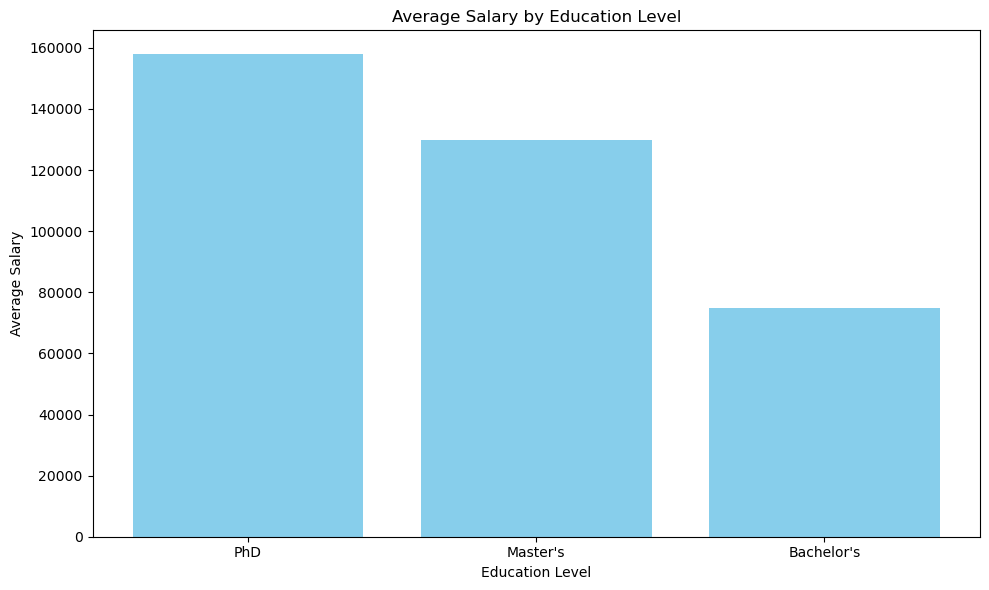

In [7]:
#average salary by Education Level
average_salary = df.groupby('Education Level')['Salary'].mean().reset_index()

#average salary
average_salary = average_salary.sort_values(by='Salary', ascending=False)

#bar chart
plt.figure(figsize=(10, 6))
plt.bar(average_salary['Education Level'], average_salary['Salary'], color='skyblue')

plt.title('Average Salary by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.tight_layout()  
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


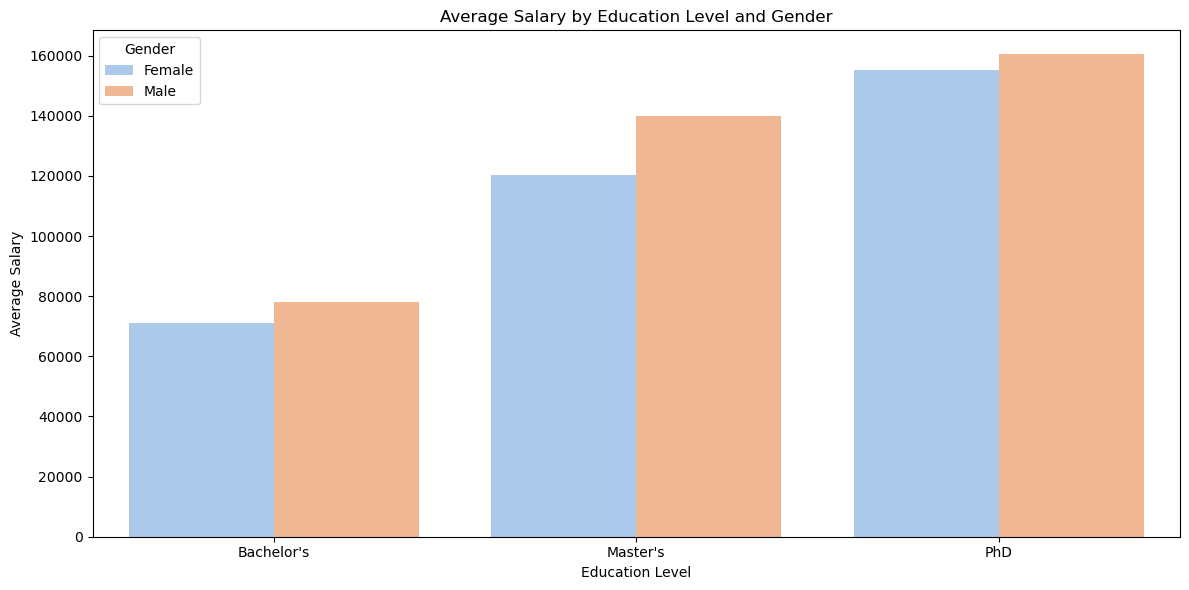

In [8]:
#same but add gender difference
average_salary = df.groupby(['Education Level', 'Gender'])['Salary'].mean().reset_index()

#bar chart
plt.figure(figsize=(12, 6))
sns.barplot(x='Education Level', y='Salary', hue='Gender', data=average_salary, palette='pastel')
plt.title('Average Salary by Education Level and Gender')
plt.xlabel('Education Level')
plt.ylabel('Average Salary')
plt.tight_layout()  
plt.legend(title='Gender')  
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


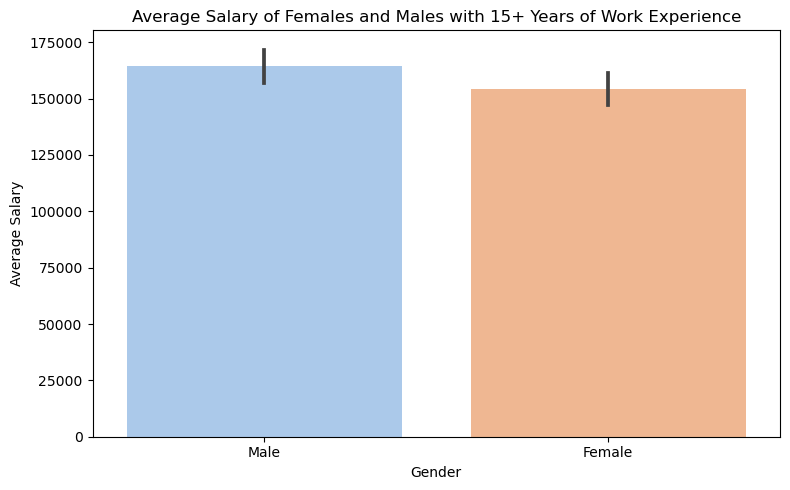

In [9]:
#average salary by gender for 15+ Years of Working Experience
filtered_df = df[df['Years of Experience'] >= 15]  # Adjust column name if necessary

#bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x='Gender', y='Salary', data=filtered_df, palette='pastel')
plt.title('Average Salary of Females and Males with 15+ Years of Work Experience')
plt.xlabel('Gender')
plt.ylabel('Average Salary')
plt.tight_layout()  
plt.show()

C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


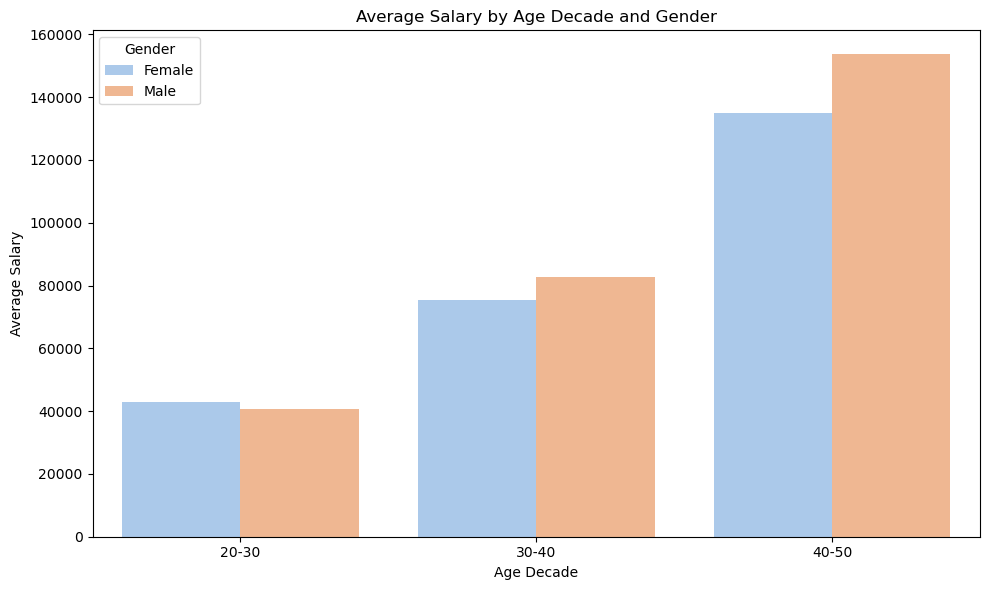

In [10]:
#deacde specific average salaries by gender
def age_decade(age):
    if 20 <= age < 30:
        return '20-30'
    elif 30 <= age < 40:
        return '30-40'
    elif 40 <= age < 50:
        return '40-50'
    else:
        return None  

df['Age Decade'] = df['Age'].apply(age_decade)

filtered_df = df.dropna(subset=['Age Decade'])

average_salary = filtered_df.groupby(['Age Decade', 'Gender'])['Salary'].mean().reset_index()

#bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Age Decade', y='Salary', hue='Gender', data=average_salary, palette='pastel')
plt.title('Average Salary by Age Decade and Gender')
plt.xlabel('Age Decade')
plt.ylabel('Average Salary')
plt.tight_layout()  
plt.show()

### **Histogram**

<Figure size 1400x800 with 0 Axes>

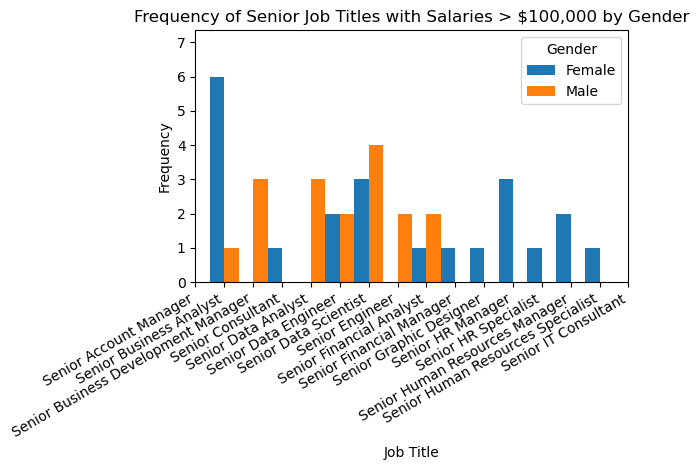

In [11]:
df = pd.read_csv('SalaryData_cleandf.csv')

#salary more than $100,000
filtered_df = df[(df['Salary'] > 100000) & (df['Job Title'].str.contains('Senior', case=False))]

#calc job count by gender
job_counts = filtered_df.groupby(['Job Title', 'Gender']).size().unstack(fill_value=0)


plt.figure(figsize=(14, 8))  
job_counts.plot(kind='bar', stacked=False, width=1.0)  # Adjust bar width
plt.title('Frequency of Senior Job Titles with Salaries > $100,000 by Gender')
plt.xlabel('Job Title')
plt.ylabel('Frequency')
plt.xlim(0,15)
plt.xticks(rotation=30, ha='right')  # Adjust x-axis label rotation
plt.legend(title='Gender')
plt.tight_layout()
plt.show()